# **Project Title: Bank Customer Churn Classification**

## Project Overview:
The goal of this project is to build a classification model to help the bank's product team identify customers who are most likely to churn. Customer churn occurs when a customer stops using a product or service. By predicting which customers are at the highest risk of leaving, the bank can take proactive steps to retain them, thereby increasing revenue.

## Problem Statement:
The bank's product team aims to reduce customer churn to boost company revenue. The task is to create a predictive model that identifies customers who are at the highest risk of leaving, allowing the team to implement targeted retention strategies.

## Objectives:
1. Explore and analyze the dataset to gain initial insights.
2. Prepare the data for modeling, including cleaning and feature engineering.
3. Build and evaluate a logistic regression model to predict customer churn.
4. Develop and fine-tune a random forest model for improved predictive performance.


## Objective 1:Profile & explore the data
- Import the “Bank_Churn.csv” file and set an appropriate data type for each column
- Check for missing values and calculate the min, max, and mean for numeric columns
- Build a scatterplot matrix to find relationships between all pairs of numeric columns
- Build box plots for each numeric column broken out by the target variable, “Exited”
- Build bar charts that show the percentage of “Exited” by category for each categorical column

**Import the “Bank_Churn.csv” file**

In [1]:
# import pandas library
import pandas as pd
# Load Data
df = pd.read_csv(r'C:\Users\ELITEBOOK 840 G3\OneDrive\Desktop\Bank_Customer_Classification\Bank_Churn.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check for missing values and data types**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


**Calculate the min, max, and mean for numeric columns**

In [3]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Scatterplot matrix to find relationships between all pairs of numeric columns**

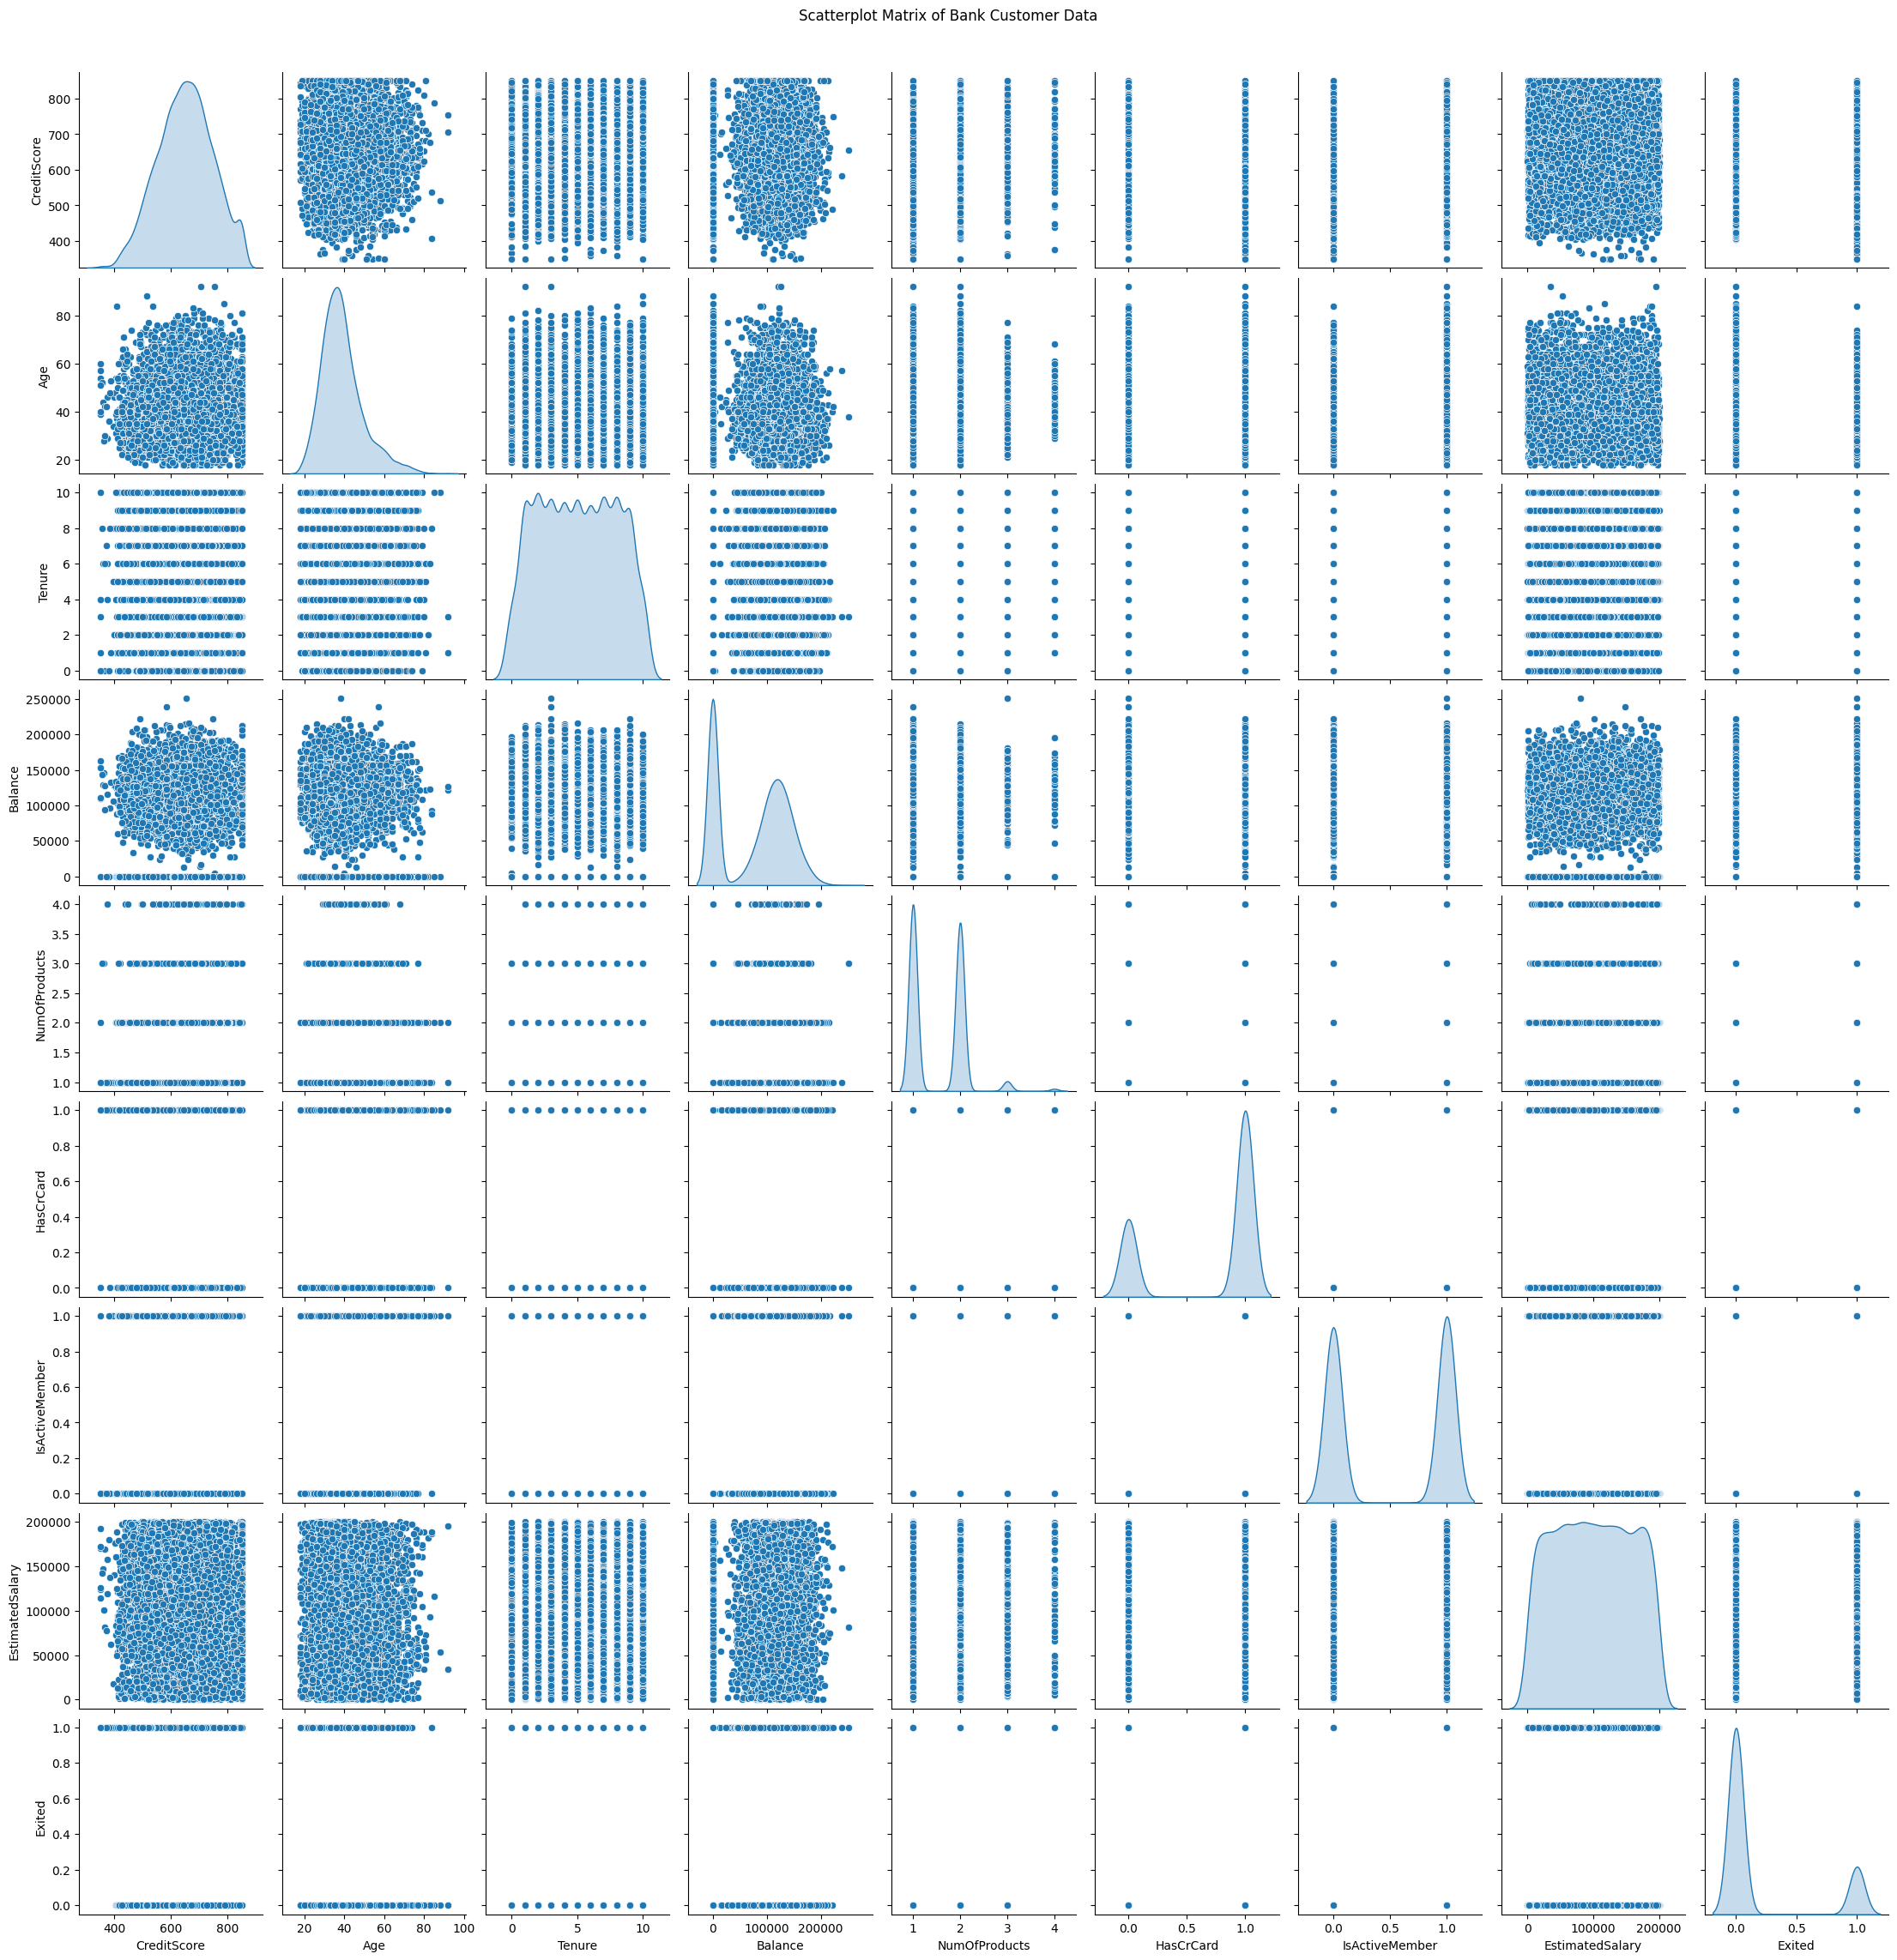

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                   'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Create pairplot for the numeric columns
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.suptitle('Scatterplot Matrix of Bank Customer Data', y=1.02)
plt.show()

**Check for multicollinearity using correlation**

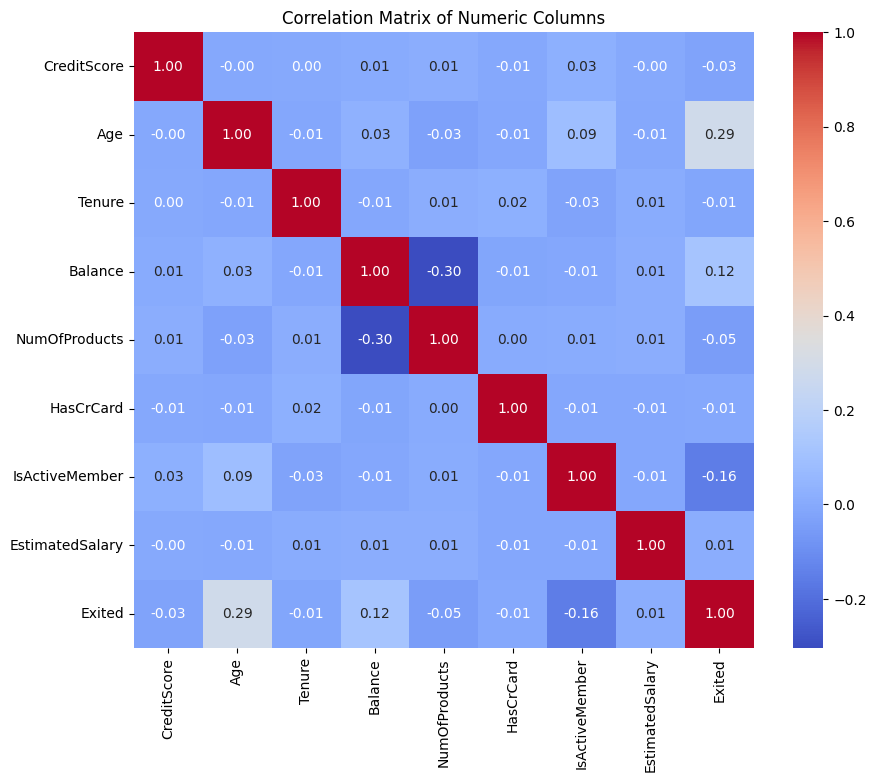

In [5]:
# List of numeric columns
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                   'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Compute correlation matrix
correlation_matrix = df[numeric_columns].corr()


# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [6]:
# Display the correlation matrix
correlation_matrix


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


- 1: Perfect positive correlation (as one variable increases, the other increases).
- -1: Perfect negative correlation (as one variable increases, the other decreases).
- 0: No correlation (the variables do not affect each other).

**Interpreting the Correlations:**

1. CreditScore:
- It has a very weak negative correlation with Exited (-0.027). This suggests that credit score does not have a strong relationship with whether a customer churns or not.

2. Age:
- Exited has a moderate positive correlation with Age (0.285). This indicates that older customers are more likely to churn compared to younger ones.

- IsActiveMember shows a weak positive correlation with Age (0.085), meaning older customers are slightly more likely to be active members.

3. Tenure:
- Tenure is almost uncorrelated with Exited (-0.014), implying that how long a customer has been with the bank does not significantly affect churn.

- There's little to no correlation between Tenure and other variables.

4. Balance:
- There’s a positive correlation with Exited (0.118), suggesting that customers with higher balances are more likely to churn, though the relationship is weak.

- Balance has a strong negative correlation with NumOfProducts (-0.304), meaning customers with more products tend to have lower balances.

5. NumOfProducts:
- It has a weak negative correlation with Exited (-0.048), meaning that customers with more products are slightly less likely to churn.

- There is a strong negative correlation between NumOfProducts and Balance (-0.304), indicating that customers with more products tend to have lower balances.

6. HasCrCard:
- HasCrCard does not have any significant correlations with other variables, meaning having a credit card does not heavily influence the relationships with churn or other financial characteristics.

7. IsActiveMember:
- There's a moderate negative correlation with Exited (-0.156), indicating that active members are less likely to churn.

- There is a weak positive correlation between IsActiveMember and Age (0.085), meaning active members tend to be slightly older.

8. EstimatedSalary:
- Salary has a very weak correlation with Exited (0.012), suggesting salary is not a major factor in customer churn.

**Conclusion:**
- Age and Balance show the strongest correlations with Exited (churn), where older customers and those with higher balances are more likely to leave.
- IsActiveMember has the most negative correlation with Exited, indicating that being an active member reduces the likelihood of churn.
- Most other variables have very weak or no significant correlation with churn, meaning their effect on customer churn is minimal.
- This matrix suggests that Age, Balance, and Active Membership Status are the most important features influencing churn, but none of these relationships are particularly strong.

**Box plots for each numeric column broken out by the target variable, “Exited”**

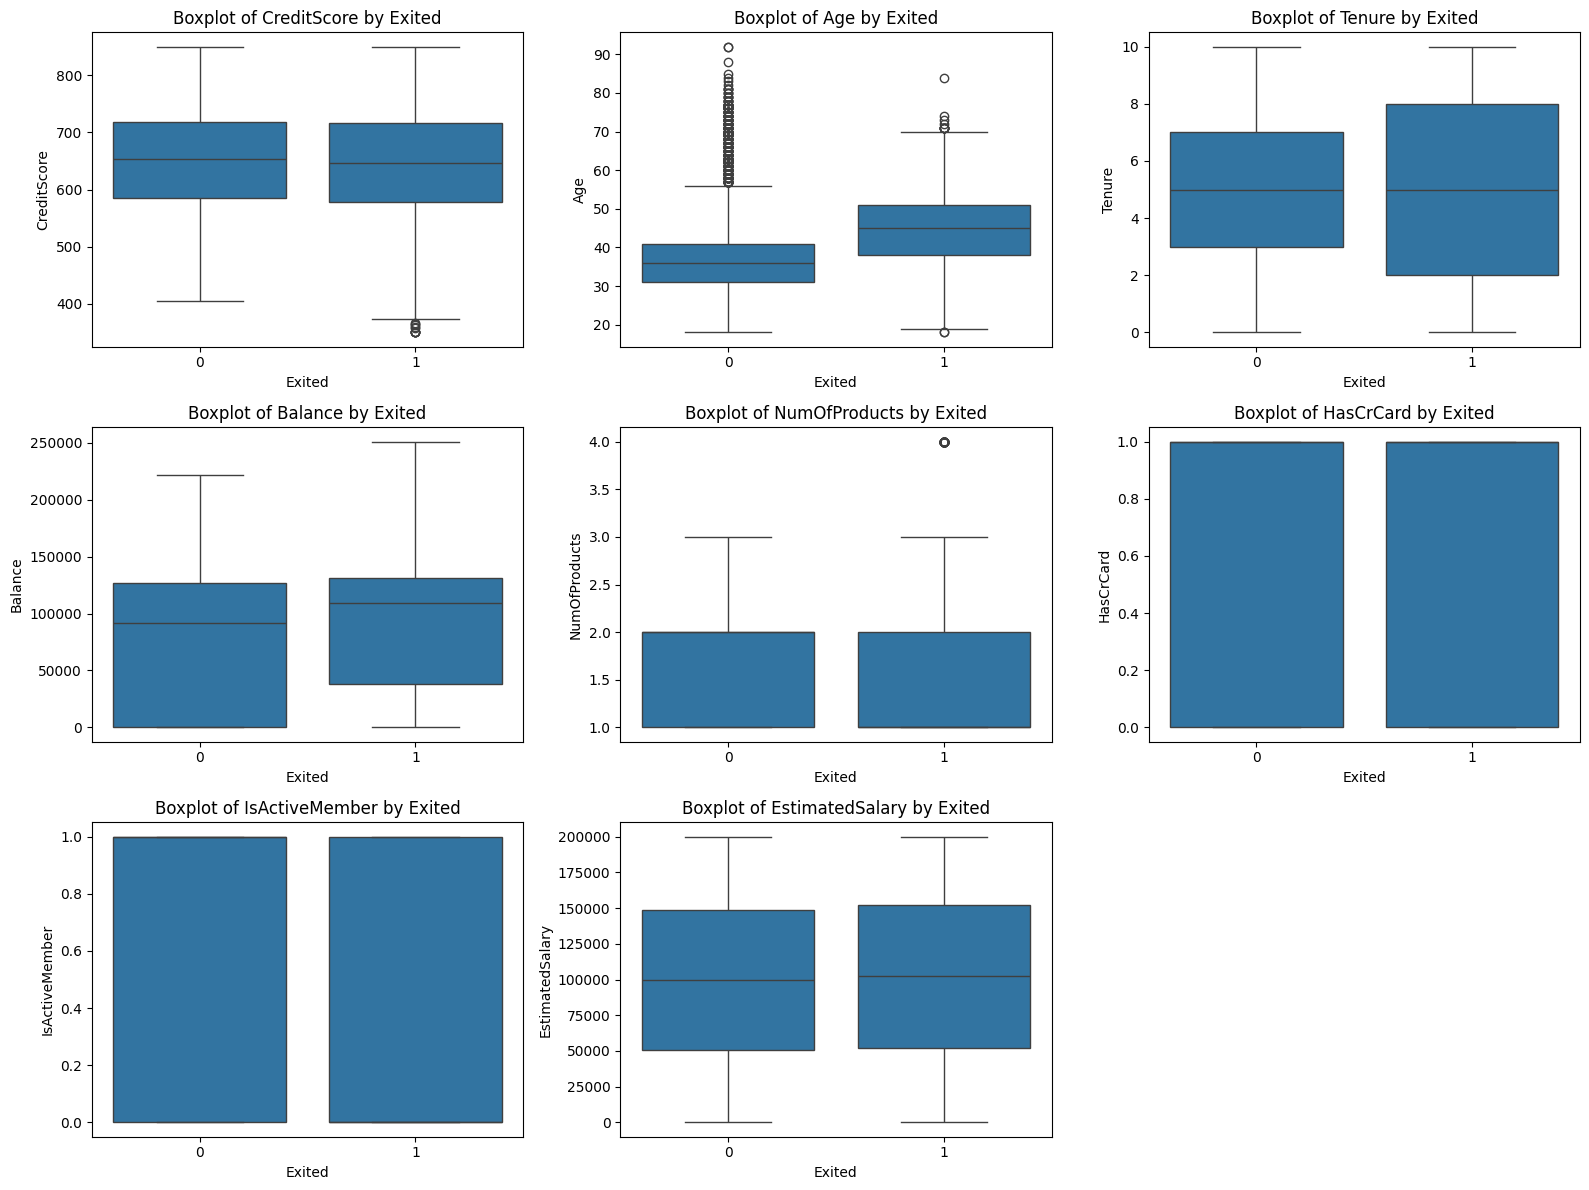

In [7]:
# List of numeric columns (including the target variable 'Exited')
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                   'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Plot boxplots for each numeric column broken down by 'Exited'
plt.figure(figsize=(16, 12))

# Loop through each numeric column
for i, col in enumerate(numeric_columns[:-1]):  # Exclude 'Exited' itself from the loop
    plt.subplot(3, 3, i + 1)  # Create a grid for subplots
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'Boxplot of {col} by Exited')

plt.tight_layout()
plt.show()

1. Credit Score: There's not much difference in credit scores between those who stayed and left, both groups averaging around 600-700.

2. Age: People who left (1) tend to be older (around 40-50) compared to those who stayed (0) who are generally younger (around 30-40).

3. Tenure (years at company): Those who left had slightly longer tenure (median around 5 years) compared to those who stayed (median around 4 years).

4. Balance (bank balance): Not much difference in account balances between the two groups, though there's wide variation in both.

5. Number of Products: Both groups typically have 1-2 products, with very little difference between them.

6. Has Credit Card: Almost identical between both groups, suggesting having a credit card doesn't influence whether someone leaves.

7. Is Active Member: Very similar between groups, showing active membership status doesn't strongly relate to leaving.

8. Estimated Salary: Salaries are fairly similar between both groups, with wide ranges in both cases.

**Key Takeaway:** Among all these factors, age seems to show the most notable difference between those who stayed and those who left, with older employees being more likely to leave. Most other factors show minimal differences between the two groups.

- Based on this  data visualization, age appears to be the strongest differentiating factor between clients who stay and leave, while most other metrics show minimal differences.

**Bar charts that show the percentage of “Exited” by category for each categorical column**

In [8]:
unique_values = df['Geography'].unique()
unique_values

array(['France', 'Spain', 'Germany'], dtype=object)

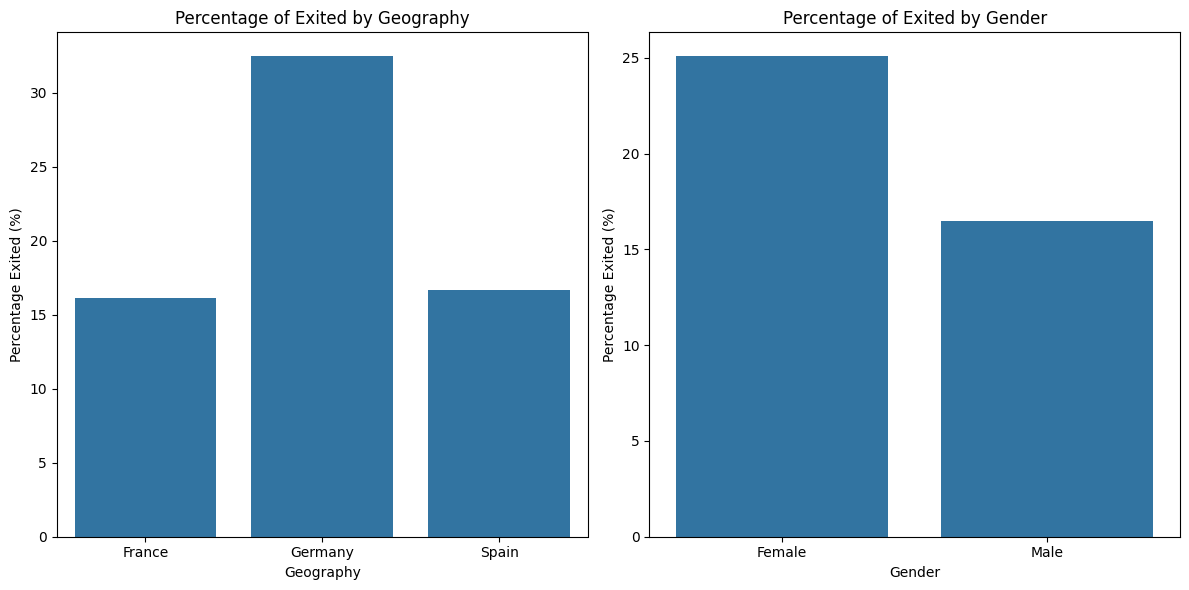

In [9]:
# Categorical columns
categorical_columns = ['Geography', 'Gender']

# Create subplots for each categorical column
plt.figure(figsize=(12, 6))

for i, col in enumerate(categorical_columns):
    plt.subplot(1, 2, i + 1)
    
    # Calculate percentage of Exited by category
    category_percent = df.groupby(col)['Exited'].mean() * 100  # Mean gives the proportion of Exited
    
    # Plot the bar chart
    sns.barplot(x=category_percent.index, y=category_percent.values)
    plt.title(f'Percentage of Exited by {col}')
    plt.ylabel('Percentage Exited (%)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

1. Percentage of Exited by Geography:
- Shows exit rates for three European countries: France, Germany, and Spain
- Germany has the highest exit rate at around 32%
- France and Spain have similar exit rates at around 16%
2. Percentage of Exited by Gender:
- Compares exit rates between Male and Female customers
- Females have a notably higher exit rate (about 25%)
- Males have a lower exit rate (about 16%)

**Key Insights:**
- German customers are significantly more likely to exit compared to French or Spanish customers
- Female customers are more likely to exit than male customers

# Objective 2: Prepare the data for modeling, including cleaning and feature engineering.
- Drop columns that aren’t suitable for modeling from the dataset
- Create a new column, “balance_to_income”, by dividing “Balance” by “EstimatedSalary”
- Create a new column, “income_v_products”, by dividing “EstimatedSalary” by “NumOfProducts”
- Create dummy variables for categorical columns
- Split the data into train and test sets, with 20% of the rows in the test set


**Drop columns that aren’t suitable for modeling from the dataset**

Based on our Exploratory Data Analysis, we have seen that the relevant feaures that influence Exited(target variable) are CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts,	HasCrCard, IsActiveMember and EstimatedSalary

In [10]:
df_copy = df.copy()
df_relevant = df_copy.drop(['CustomerId', 'Surname'], axis=1).reset_index(drop=True)
df_relevant.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Create a new columns, “balance_to_income”, by dividing “Balance” by “EstimatedSalary”, and “income_v_products”, by dividing “EstimatedSalary” by “NumOfProducts”**

In [11]:
# Create the 'balance_to_income' column by dividing 'Balance' by 'EstimatedSalary'
df_relevant['balance_to_income'] = df_relevant['Balance'] / df_relevant['EstimatedSalary']

# Create the 'income_v_products' column by dividing 'EstimatedSalary' by 'NumOfProducts'
df_relevant['income_vs_products'] = df_relevant['EstimatedSalary'] / df_relevant['NumOfProducts']

# Display the updated DataFrame
df_relevant.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_vs_products
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100


**Creating dummy variables for categorical columns**

In [14]:
# Create dummy variables for the categorical columns
df_relevant_with_dummies = pd.get_dummies(df_relevant, columns=['Geography', 'Gender'], drop_first=True)

# Convert only boolean columns to integers
bool_cols = df_relevant_with_dummies.select_dtypes(include='bool').columns
df_relevant_with_dummies[bool_cols] = df_relevant_with_dummies[bool_cols].astype(int)

# Display the updated DataFrame with dummy variables
df_relevant_with_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_vs_products,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0


In [15]:
df_relevant_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   balance_to_income   10000 non-null  float64
 10  income_vs_products  10000 non-null  float64
 11  Geography_Germany   10000 non-null  int32  
 12  Geography_Spain     10000 non-null  int32  
 13  Gender_Male         10000 non-null  int32  
dtypes: float64(4), int32(3), int64(7)
memory usage: 976.7 KB


In [29]:
df_relevant_with_dummies.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_vs_products,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,3.878703,74715.158001,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,108.337260,52058.899406,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,32589.780000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.747002,65908.002500,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.514022,100943.797500,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,10614.655440,199970.740000,1.000000,1.000000,1.000000


**Split the data into train and test sets, with 20% of the rows in the test set**

In [16]:
from sklearn.model_selection import train_test_split

# Extract features
X = df_relevant_with_dummies.drop('Exited', axis = 1)
y =df_relevant_with_dummies['Exited']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state= 42)



In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8000 non-null   int64  
 1   Age                 8000 non-null   int64  
 2   Tenure              8000 non-null   int64  
 3   Balance             8000 non-null   float64
 4   NumOfProducts       8000 non-null   int64  
 5   HasCrCard           8000 non-null   int64  
 6   IsActiveMember      8000 non-null   int64  
 7   EstimatedSalary     8000 non-null   float64
 8   balance_to_income   8000 non-null   float64
 9   income_vs_products  8000 non-null   float64
 10  Geography_Germany   8000 non-null   int32  
 11  Geography_Spain     8000 non-null   int32  
 12  Gender_Male         8000 non-null   int32  
dtypes: float64(4), int32(3), int64(6)
memory usage: 781.2 KB


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6252 to 6929
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         2000 non-null   int64  
 1   Age                 2000 non-null   int64  
 2   Tenure              2000 non-null   int64  
 3   Balance             2000 non-null   float64
 4   NumOfProducts       2000 non-null   int64  
 5   HasCrCard           2000 non-null   int64  
 6   IsActiveMember      2000 non-null   int64  
 7   EstimatedSalary     2000 non-null   float64
 8   balance_to_income   2000 non-null   float64
 9   income_vs_products  2000 non-null   float64
 10  Geography_Germany   2000 non-null   int32  
 11  Geography_Spain     2000 non-null   int32  
 12  Gender_Male         2000 non-null   int32  
dtypes: float64(4), int32(3), int64(6)
memory usage: 195.3 KB


# Objective 3: Build and evaluate a logistic regression model to predict customer churn.
- Fit a logistic regression model on your training data
- Build a confusion matrix to evaluate your model
- Calculate accuracy, precision, recall, and F1 for your test data
- Plot an ROC curve and calculate the AUC statistic
- Plot precision and recall against the model threshold (set the threshold to the value where recall is the highest, but precision is still above 50%)

**Fit a logistic regression model on your training data**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter= 10000)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)


c:\Users\ELITEBOOK 840 G3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Build a confusion matrix to evaluate your model**

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.82
Confusion Matrix:
[[1552   55]
 [ 307   86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1607
           1       0.61      0.22      0.32       393

    accuracy                           0.82      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.79      0.82      0.78      2000



1. Accuracy: 0.82
- This means that the model correctly predicted the target variable 82% of the time. In other words, out of 2000 total predictions, about 1640 were correct.

2. Confusion Matrix:
- True Negatives (TN): 1552 instances where the model correctly predicted class 0 (not having an insurance claim).
- False Positives (FP): 55 instances where the model incorrectly predicted class 1 (predicted an insurance claim when there wasn't one).
- False Negatives (FN): 307 instances where the model incorrectly predicted class 0 (predicted no insurance claim when there was one).
- True Positives (TP): 86 instances where the model correctly predicted class 1 (having an insurance claim).

3. Classification Report:
This report provides detailed metrics for each class (0 and 1).

**Class 0 (Not Exited):**
- Precision (0.83): Of all instances predicted as class 0, 83% were actually class 0. High precision means fewer false alarms.
- Recall (0.97): Of all actual class 0 instances, 97% were correctly identified. High recall means the model successfully identified most class 0 cases.
- F1-Score (0.90): This is the harmonic mean of precision and recall, providing a balance between the two. It indicates good overall performance for class 0.

**Class 1 (Exited):**
- Precision (0.61): Of all instances predicted as class 1, 61% were actually class 1. This is lower, indicating more false alarms compared to class 0.
- Recall (0.22): Of all actual class 1 instances, only 22% were correctly identified. This is low, indicating that many actual claims were missed by the model.
- F1-Score (0.32): This score reflects the model's poor performance in identifying class 1 cases due to low precision and recall.


4. Averages:
Macro Average:

- Precision: 0.72
- Recall: 0.59
- F1-Score: 0.61
- This average is calculated by treating all classes equally, giving insight into the model's overall performance across classes.

5. Weighted Average:

- Precision: 0.79
- Recall: 0.82
- F1-Score: 0.78
- This average considers the number of instances in each class, giving more weight to larger classes. It shows better performance due to the higher volume of class 0.

The model is generally good at predicting class 0 (not exited), but it struggles with class 1 (exited), where it has low recall. This suggests that while the model is accurate overall, it may not be effective for identifying cases where clients have exited.

**Plot an ROC curve and calculate the AUC statistic**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the test set
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)


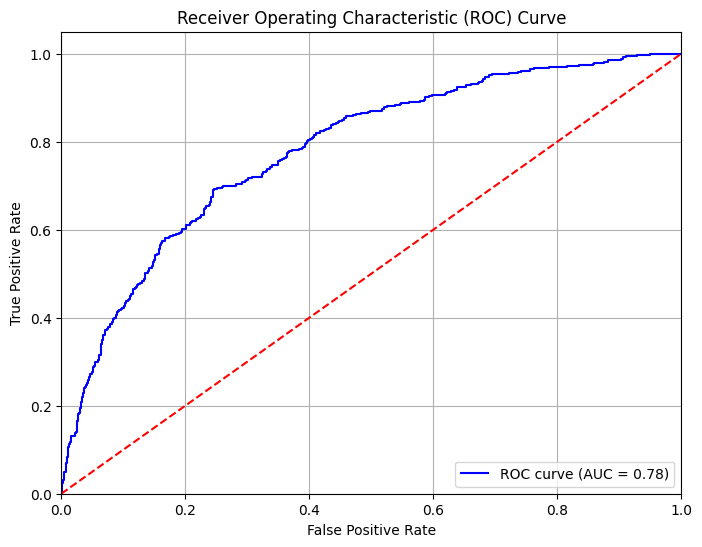

In [23]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


- True Positive Rate (Sensitivity) is plotted on the y-axis.
- False Positive Rate (1-Specificity) is plotted on the x-axis.
- The curve represents the trade-off between sensitivity and specificity as the threshold changes
- The Area Under the Curve (AUC) is 0.78, indicating a good level of discrimination. AUC values range from 0 to 1, with 1 being perfect and 0.5 representing no discrimination (random guessing).
- The curve is above the diagonal line (red), which represents a model better than random chance.
- Overall, the classifier has a decent ability to distinguish between the two classes.

- The ROC curve shows good model performance with an AUC of 0.78. 

**Plot precision and recall against the model threshold (set the threshold to the value where recall is the highest, but precision is still above 50%)**

Best threshold (where recall is highest with precision > 50%): 0.35


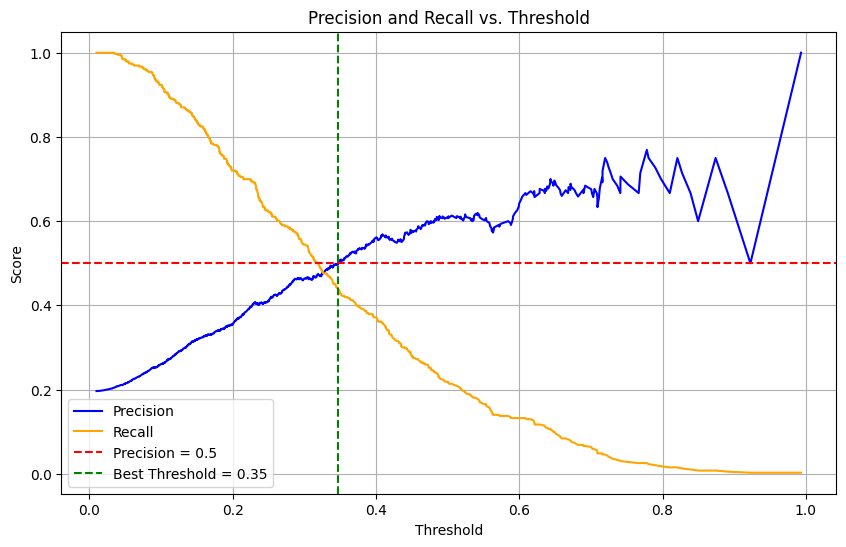

In [24]:
from sklearn.metrics import precision_recall_curve

#  Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold where recall is highest, but precision is still above 50%
best_threshold = None
max_recall = 0
for i in range(len(recall)):
    if precision[i] > 0.5 and recall[i] > max_recall:
        max_recall = recall[i]
        best_threshold = thresholds[i - 1] if i > 0 else thresholds[i]

# Print the best threshold found
print(f'Best threshold (where recall is highest with precision > 50%): {best_threshold:.2f}')

# Plot precision and recall against the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.axhline(y=0.5, color='red', linestyle='--', label='Precision = 0.5')

# Mark the best threshold on the plot
if best_threshold is not None:
    plt.axvline(x=best_threshold, color='green', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid()
plt.show()

- As the threshold increases (moving right), precision tends to increase but recall decreases
- As the threshold decreases (moving left), recall increases but precision decreases
- The best threshold is identified at 0.35 (green dashed line) because:
    - At this point, recall is still relatively high (around 45-50%)
    - Precision stays above 50% (above the red dashed line)
- This represents a good balance between precision and recall

Practical meaning:
- If you set the threshold too high (>0.35):
You'll be more precise but miss many positive cases

- If you set the threshold too low (<0.35):
You'll catch more positive cases but have more false positives


- The 0.35 threshold represents an optimal balance point where the model maintains acceptable precision while maximizing recall.This threshold choice essentially means you're saying "I want to be right at least 50% of the time while catching as many positive cases as possible."

# Objective 4: Develop and fine-tune a random forest model for improved predictive performance.
- Fit a random forest model with default hyperparameters
- Use cross validation to tune your model's hyperparameters
- Report the final test accuracy and AUC score
- Build a bar chart that shows feature importance

**Fit a random forest model with default hyperparameters**

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest model with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)  # Setting random_state for reproducibility
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.86
Confusion Matrix:
[[1548   59]
 [ 212  181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



1. Accuracy: The model correctly predicted the target variable 86% of the time.

2. Confusion Matrix:

    - True Negatives (0 predicted as 0): 1548
    - False Positives (0 predicted as 1): 59
    - False Negatives (1 predicted as 0): 212
    - True Positives (1 predicted as 1): 181

3. Classification Report:

For class 0 (not exited):

    - Precision: 88% (of the predicted 0s, 88% were correct)
    - Recall: 96% (of the actual 0s, 96% were correctly predicted)
    - F1-Score: 92% (harmonic mean of precision and recall)

For class 1 (exited):

    - Precision: 75% (of the predicted 1s, 75% were correct)
    - Recall: 46% (of the actual 1s, only 46% were correctly predicted)
    - F1-Score: 57% (a balance between precision and recall)

4. Overall Metrics:

- Macro Average: Averages the precision, recall, and F1-score for both classes without considering class imbalance.
- Weighted Average: Takes into account the support (number of true instances) for each class, giving a more balanced view of performance.

5. Summary
- The model performs well overall, with high accuracy and good precision for class 0. However, it struggles with class 1, where recall is relatively low, indicating it misses a significant number of actual positive cases.

**Use cross validation to tune your model's hyperparameters and Report the final test accuracy**

In [26]:
from sklearn.model_selection import  GridSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.86
Confusion Matrix:
[[1545   62]
 [ 214  179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



1. Best Hyperparameters:

    - max_depth: None: This means there is no limit to the depth of the trees in the forest, allowing them to grow until all leaves are pure or until they contain fewer than min_samples_split samples.
    - min_samples_leaf: 4: This is the minimum number of samples required to be at a leaf node. Setting this parameter helps prevent overfitting by ensuring that leaves have a minimum number of samples.
    - min_samples_split: 10: This is the minimum number of samples required to split an internal node. It helps control the size of the tree.
    - n_estimators: 200: This is the number of trees in the forest. More trees can improve the model's performance but also increase computation time.

2. Accuracy:

    - The model achieved an accuracy of 0.86, meaning it correctly predicted 86% of the instances in the dataset.

3. Confusion Matrix:

    - True Negatives (TN): 1545 (correctly predicted class 0)
    - False Positives (FP): 62 (incorrectly predicted class 1)
    - False Negatives (FN): 214 (incorrectly predicted class 0)
    - True Positives (TP): 179 (correctly predicted class 1)

4. Classification Report:

- Precision: The ratio of correctly predicted positive observations to the total predicted positives. For class 0, it's 0.88, and for class 1, it's 0.74. This means that when the model predicts a class 1, it is correct 74% of the time.
- Recall: The ratio of correctly predicted positive observations to all actual positives. For class 0, it's 0.96, and for class 1, it's 0.46. This indicates that the model is better at identifying class 0 than class 1.
- F1-Score: The weighted average of precision and recall. For class 0, it's 0.92, and for class 1, it's 0.56. The F1-score is lower for class 1, indicating a trade-off between precision and recall.
- Support: The number of actual occurrences of the class in the specified dataset. There are 1607 instances of class 0 and 393 instances of class 1.

5. Overall Performance:

- The model performs well in predicting class 0, with high precision, recall, and F1-score. However, it struggles with class 1, as indicated by the lower recall and F1-score. This could be due to class imbalance or the complexity of the class 1 instances.

**AUC score**

In [27]:
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class (class 1)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print the AUC score
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.87


- An AUC Score of 0.87 indicates that your model has good discriminative ability, meaning it measures how well the random forest model can distinguish between the positive class and the negative class.
- With an AUC score of 0.87, your model performs well at distinguishing between the two classes. This score suggests that the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

**Build a bar chart that shows feature importance**

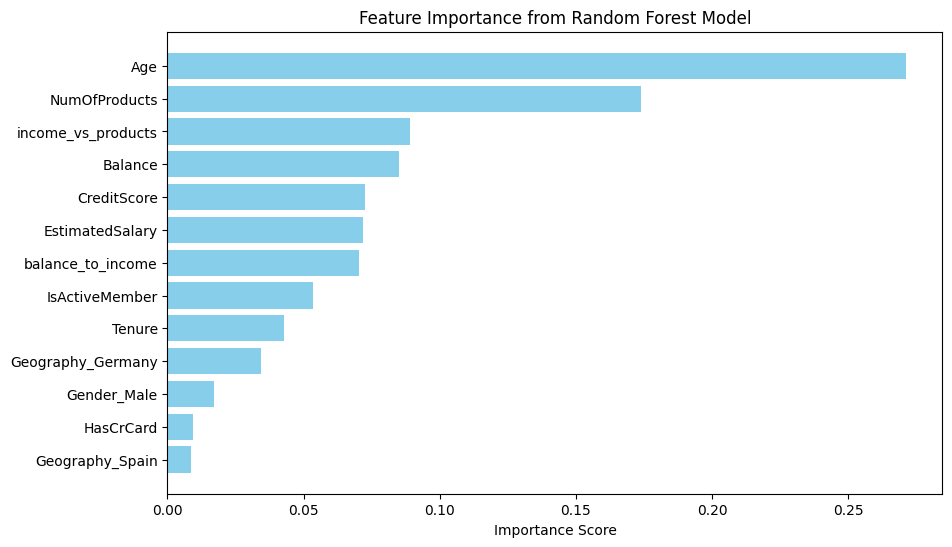

In [28]:
# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top
plt.show()

- Age is by far the most important feature, with an importance score of about 0.25
- Number of Products (NumOfProducts) is the second most important feature with a score around 0.18
- Income vs products, Balance, Credit Score, and Estimated Salary form a middle tier of importance (scores between 0.08-0.12)
- Demographic factors like Geography (Germany/Spain) and Gender (Male) have relatively low importance
- Having a credit card (HasCrCard) and Geography_Spain are the least important features
- This visualization helps understand which customer characteristics have the strongest influence on churn which the model is predicting.

# **Recommendations**


1. Enhancing Customer Engagement:

    - Develop targeted marketing and retention strategies for customers identified as high-risk for churn. This may include personalized offers, loyalty programs, or proactive outreach to address customer concerns.
    - Implement customer feedback loops to understand reasons for dissatisfaction, using insights to inform service improvements.

2. Model Refinement:

- Explore additional models and advanced techniques (e.g., Gradient Boosting, Neural Networks) to potentially enhance predictive accuracy and recall.
- Consider using ensemble methods or stacking models to combine the strengths of various algorithms for improved predictions.

3. Threshold Adjustment:

- Adjust the decision threshold based on business objectives. Given the importance of identifying potential churners, lowering the threshold may increase recall at the expense of precision, which can be acceptable in a churn prediction context where retaining customers is critical.

4. Regular Monitoring and Updates:

    - Regularly monitor model performance as customer behaviors and banking environments evolve. Continuous training and validation of the model on new data will ensure its effectiveness and adaptability to changing patterns.
    - Establish a system for periodic reassessment of feature importance and model performance metrics to stay aligned with business goals.

5. Feature Engineering:

    - Investigate additional features that could be engineered from existing data, such as customer engagement metrics (frequency of transactions, interaction with customer service) or external data sources (economic indicators) that may influence churn.
    - Conduct exploratory data analysis (EDA) to identify potential correlations or patterns that may not have been initially considered.

6. Customer Segmentation:

    - Implement a segmentation strategy to categorize customers based on their likelihood to churn and tailor interventions accordingly. For instance, high-risk segments could receive specialized attention or different marketing approaches.
    - Analyze churn rates by different customer segments (age, income level, product usage) to identify specific groups that may need more targeted retention efforts.

7. Data-Driven Culture:

    - Foster a data-driven culture within the bank, encouraging departments to utilize data analytics in decision-making processes, particularly in customer relationship management and marketing strategies.
    - Provide training for staff on interpreting model outputs and leveraging insights to enhance customer satisfaction and loyalty.

# **Conclusion**

- The Bank Customer Churn Analysis Project has provided valuable insights into the factors influencing customer retention. By implementing the recommended strategies, the bank can enhance its ability to retain customers, reduce churn, and ultimately improve its financial performance. Continued investment in data analytics will be crucial for adapting to evolving customer needs and market